In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('athrav_sawer_ann_predictions.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
len(training_set)

596

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range(60, 596):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
/home/akash/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/akash/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/akash/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/akash/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [7]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

W1227 18:11:44.515787 139732141958976 deprecation_wrapper.py:119] From /home/akash/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/100
536/536 [==============================] - 12s 23ms/step - loss: 0.1307
Epoch 2/100
536/536 [==============================] - 6s 11ms/step - loss: 0.0207
Epoch 3/100
536/536 [==============================] - 6s 11ms/step - loss: 0.0143
Epoch 4/100
536/536 [==============================] - 5s 10ms/step - loss: 0.0118
Epoch 5/100
536/536 [==============================] - 6s 11ms/step - loss: 0.0132
Epoch 6/100
536/536 [==============================] - 6s 11ms/step - loss: 0.0122
Epoch 7/100
536/536 [==============================] - 6s 11ms/step - loss: 0.0104
Epoch 8/100
536/536 [==============================] - 7s 13ms/step - loss: 0.0106
Epoch 9/100
536/536 [==============================] - 7s 13ms/step - loss: 0.0103
Epoch 10/100
536/536 [==============================] - 5s 10ms/step - loss: 0.0096
Epoch 11/100
536/536 [==============================] - 6s 11ms/step - loss: 0.0103
Epoch 12/100
536/536 [==============================] - 6s 11ms/step - loss: 0.0104


536/536 [==============================] - 3s 5ms/step - loss: 0.0057
Epoch 100/100
536/536 [==============================] - 3s 6ms/step - loss: 0.0060


In [8]:
dataset_test = pd.read_csv('athrav_sawer_ann_predictions.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [9]:
dataset_total = pd.concat((dataset_train['Modal Price (Rs./Quintal)'], dataset_test['Modal Price (Rs./Quintal)']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 596):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [10]:
len(predicted_stock_price)

536

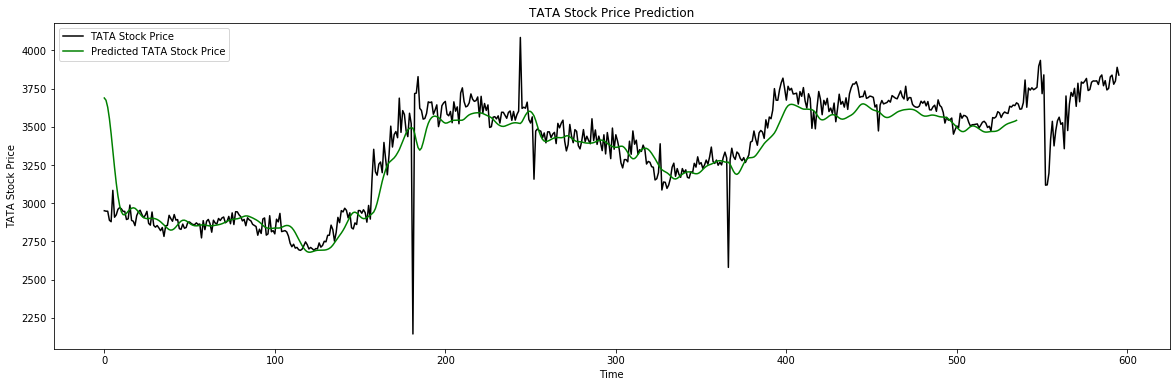

In [11]:
plt.figure(figsize=(20,6))
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()